In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
event_params = pd.read_csv('/Users/bhaskaradhikari/freelance/data/external/event_params.csv')
traffic_sources = pd.read_csv('/Users/bhaskaradhikari/freelance/data/external/traffic_sources.csv')
active_users_df = pd.read_csv('/Users/bhaskaradhikari/freelance/data/external/active_users_df.csv')
geo_insights_df = pd.read_csv('/Users/bhaskaradhikari/freelance/data/external/geo_insights_df.csv')

In [80]:
event_params

,event_date,user_pseudo_id,page_title,page_location,page_referrer,event_timestamp
0,20240123,1.803115e+09,Multiple Part Numbers Search | P.com,https://www.p.com/search-list,https://www.p.com/catalog-product/collection/4...,1706041021863308
1,20240123,1.370019e+09,"Polaris 5133428 - Nut, Axle | P.com",https://www.p.com/product/polaris/5133428?ref=...,http://m.facebook.com/,1706043908464706
2,20240123,2.091432e+09,Rock-A-Billy Front/Rear Tires | P.com,https://www.p.com/catalog-product/collection/0...,http://m.facebook.com/,1706055327780748
3,20240123,1.821760e+09,"Honda 11330-MFJ-A40 - COVER, R. | P.com",https://www.p.com/product/honda/11330-MFJ-A40?...,NaN,1705989378681557
4,20240123,1.665243e+09,"P: OEM Motorcycle Parts, ATV Parts, Marine Parts",https://www.p.com/?utm_source=facebook&utm_med...,http://m.facebook.com/,1706013824763773
...,...,...,...,...,...,...
995,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,1706059367359036
996,20240123,8.756038e+08,Yamaha ATV Parts | P.com,https://www.p.com/catalog/yamaha/atv,https://www.p.com/catalog/yamaha?utm_source=fa...,1706059418688359
997,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,1706059422947325
998,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,1706059426919338


In [81]:
active_users_df = active_users_df.drop(columns=['event_date','user_pseudo_id'])

# Assuming the first merge includes 'event_date' and we want to keep it
combined_df = active_users_df.merge(event_params, on='event_timestamp', how='inner')

# Before merging other DataFrames, drop the 'event_date' column from them to avoid duplicates
traffic_sources = traffic_sources.drop(columns=['event_date','user_pseudo_id'])
geo_insights_df = geo_insights_df.drop(columns=['event_date','user_pseudo_id'])

# Continue merging without including 'event_date' again
combined_df = combined_df.merge(traffic_sources, on='event_timestamp', how='inner')
combined_df = combined_df.merge(geo_insights_df, on='event_timestamp', how='inner')

# This ensures 'event_date' is included only once in the final combined DataFrame


In [82]:
combined_df

,is_active_user,event_timestamp,event_date,user_pseudo_id,page_title,page_location,page_referrer,traffic_source_name,traffic_source_medium,traffic_source_source,city,country
0,True,1706041021863308,20240123,1.803115e+09,Multiple Part Numbers Search | P.com,https://www.p.com/search-list,https://www.p.com/catalog-product/collection/4...,(direct),(none),(direct),Columbia,United States
1,True,1706043908464706,20240123,1.370019e+09,"Polaris 5133428 - Nut, Axle | P.com",https://www.p.com/product/polaris/5133428?ref=...,http://m.facebook.com/,(referral),referral,m.facebook.com,Seattle,United States
2,True,1706055327780748,20240123,2.091432e+09,Rock-A-Billy Front/Rear Tires | P.com,https://www.p.com/catalog-product/collection/0...,http://m.facebook.com/,TNT_DPA - Interest - Prospecting,cpc,facebook,NaN,United States
3,True,1705989378681557,20240123,1.821760e+09,"Honda 11330-MFJ-A40 - COVER, R. | P.com",https://www.p.com/product/honda/11330-MFJ-A40?...,NaN,TNT_Carousel/Image - Shopping - Retargeting,cpc,facebook,Cypress,United States
4,True,1706013824763773,20240123,1.665243e+09,"P: OEM Motorcycle Parts, ATV Parts, Marine Parts",https://www.p.com/?utm_source=facebook&utm_med...,http://m.facebook.com/,TNT_Carousel/Image - Shopping - Retargeting,cpc,facebook,Lowell,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,1706059367359036,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook,Midland,United States
996,True,1706059418688359,20240123,8.756038e+08,Yamaha ATV Parts | P.com,https://www.p.com/catalog/yamaha/atv,https://www.p.com/catalog/yamaha?utm_source=fa...,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook,Midland,United States
997,True,1706059422947325,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook,Midland,United States
998,True,1706059426919338,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook,Midland,United States


In [83]:
combined_df.to_csv('/Users/bhaskaradhikari/freelance/data/external/combined_df.csv', index=False)

### How many unique users (based on user_pseudo_id) visited the website on January 23, 2024?


In [98]:
#How many unique users (based on user_pseudo_id) visited the website on January 23, 2024?
unique_users_count = combined_df['user_pseudo_id'].nunique()
unique_users_count

638

### What is the count of active users (is_active_user) for the given data/given date ?


In [99]:
#What is the count of active users (is_active_user) for the given data?
active_users_count = combined_df[combined_df['is_active_user'] == True]['is_active_user'].count()
active_users_count

948

### What are the different traffic sources (traffic_source_name) that led users to the website?


In [104]:
#What are the different traffic sources (traffic_source_name) that led users to the website?
unique_traffic_sources = combined_df['traffic_source_name'].unique()
unique_traffic_sources

array(['(direct)', '(referral)', 'TNT_DPA - Interest - Prospecting',
       'TNT_Carousel/Image - Shopping - Retargeting',
       'TNT_Carousel/Image - Shopping - Prospecting', 'Suzuki ATV Parts',
       'TNT_DPA - LAL - Prospecting',
       'TNT_Carousel/Image - CRM LAL - Prospecting',
       'TNT_DPA - LAL (Consolidated) - Prospecting',
       'TNT_DPA - Broad - Prospecting', '(organic)',
       'TNT_Carousel/Image - LAL - Prospecting', 'klarna-merchantboost',
       'TNT_Pmax - Yamaha (NCA)', 'Suzuki Motorcycle Parts',
       'TNT_Carousel/Image/Video - Retargeting', nan,
       'TNT_Carousel/Image/Video - Broad - Prospecting',
       'TNT_Carousel/Image/Video - Interest - Prospecting',
       'TNT_Shopping - All - MSAN', 'lowerfunnel', 'Catalog sales',
       'TNT_Shopping - OEM - Standard', 'Yamaha Motorcycle Parts',
       'TNT_Prospecting - +Advantage Shopping Campaign',
       'TNT_Text - Offensive Brands'], dtype=object)

### Which traffic source medium (traffic_source_medium) is the most common among the users?

In [105]:
# Most common traffic source medium
most_common_medium = combined_df['traffic_source_medium'].value_counts().idxmax()
most_common_medium_count = combined_df['traffic_source_medium'].value_counts().max()
most_common_medium, most_common_medium_count


('cpc', 742)

### Which page title (page_title) had the highest number of visits?

In [106]:
# Page title with the highest number of visits
most_visited_page_title = combined_df['page_title'].value_counts().idxmax()
most_visited_page_visits = combined_df['page_title'].value_counts().max()

most_visited_page_title, most_visited_page_visits


('P: OEM Motorcycle Parts, ATV Parts, Marine Parts', 63)

### Can we identify any trends in the type of content (e.g., OEM parts, specific brands like Polaris or Honda) that attracts more users?

In [107]:
# Identifying trends in content type by analyzing the frequency of certain keywords in page titles
keywords = ['OEM', 'Polaris', 'Honda', 'Suzuki', 'ATV', 'Motorcycle', 'Marine', 'Parts']
keyword_counts = {keyword: combined_df['page_title'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords}

keyword_counts_sorted = dict(sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True))
keyword_counts_sorted


{'Parts': 338,
 'Honda': 278,
 'OEM': 267,
 'Motorcycle': 140,
 'ATV': 131,
 'Polaris': 81,
 'Marine': 72,
 'Suzuki': 65}

### From which city did the website receive the most traffic?

In [109]:
# City with the highest traffic
most_traffic_city = combined_df['city'].value_counts().idxmax()
most_traffic_city_visits = combined_df['city'].value_counts().max()

most_traffic_city, most_traffic_city_visits


('Dallas', 35)

### Are there any insights into user preferences or behavior based on the geographical data (e.g., certain products being more popular in specific cities)?

In [110]:
# Analyzing geographical data for insights into user preferences or behavior
# Grouping data by city and then listing the most visited page titles in each city

city_preferences = combined_df.groupby('city')['page_title'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No clear preference').reset_index()
city_visit_counts = combined_df['city'].value_counts().reset_index()
city_visit_counts.columns = ['city', 'visits']

# Merging the two dataframes to include visit counts along with preferences
city_insights = pd.merge(city_preferences, city_visit_counts, on='city')
city_insights.sort_values(by='visits', ascending=False)


,city,page_title,visits
74,Dallas,2016 Polaris OEM Side by Side Parts | P.com,35
186,Los Angeles,Yamaha 1HP-F512A-00-00 - WHEEL CAP | P.com,22
300,Santo Domingo,Yamaha ATV 2024 OEM Parts Diagram for Graphics...,22
229,New Orleans,OEM Parts | P.com,19
2,Albany,2000 YAMAHA YFM350XM-WARRIOR Parts | OEM ATV P...,18
...,...,...,...
152,Janesville,Honda Parts | P.com,1
149,Irvine,| P.com,1
147,Huntingtown,Honda 06131-HM8-A40 - PISTON KIT | P.com,1
143,Homewood,2022 SUZUKI HAYABUSA - GSX1300RRQ Parts | OEM ...,1


### How effective are referral links from Facebook (page_referrer = "http://m.facebook.com/") in bringing traffic to the website compared to direct visits?

In [111]:
# Comparing effectiveness of referral links from Facebook to direct visits
# Note: Direct visits are identified by (direct) in traffic_source_name, not traffic_source_source

facebook_referral_count = combined_df[combined_df['page_referrer'] == 'http://m.facebook.com/']['page_referrer'].count()
direct_visits_count = combined_df[combined_df['traffic_source_name'] == '(direct)']['traffic_source_name'].count()

facebook_referral_count, direct_visits_count


(591, 94)

### What is the role of advertising campaigns (identified by traffic_source_name starting with "TNT_") in driving traffic to the site, and how do they compare in effectiveness?



In [115]:
# Ensuring the condition for filtering is robust against NA / NaN values
campaign_traffic_count = combined_df[combined_df['traffic_source_name'].str.startswith('TNT_', na=False)]['traffic_source_name'].count()

# Calculating the total traffic count for comparison
total_traffic_count = combined_df.shape[0]

# Calculating the proportion of traffic from campaigns
campaign_traffic_proportion = campaign_traffic_count / total_traffic_count if total_traffic_count > 0 else 0

campaign_traffic_count, total_traffic_count, campaign_traffic_proportion


(729, 1000, 0.729)

### How does user engagement vary by traffic source?

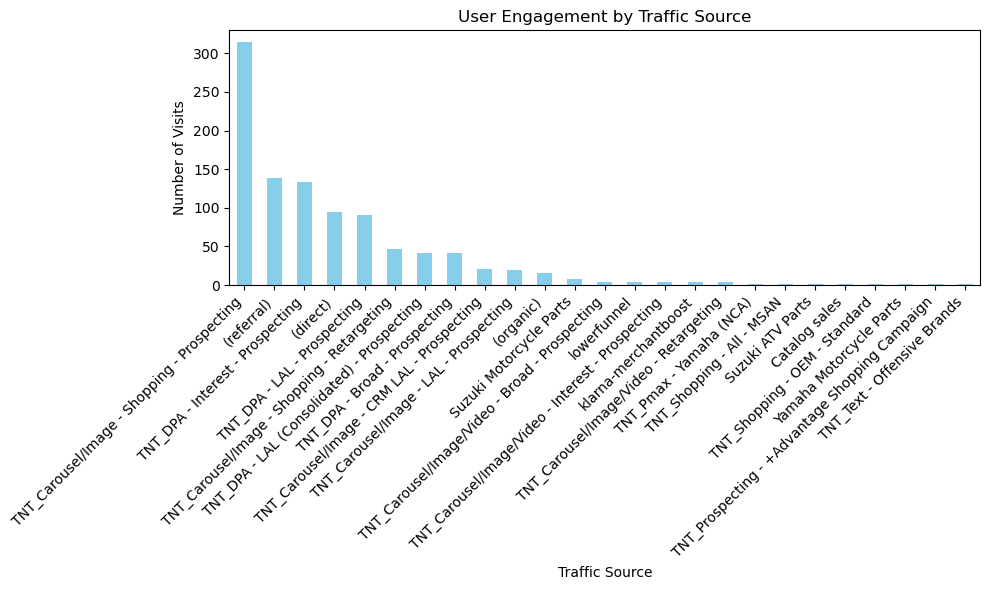

In [117]:
import matplotlib.pyplot as plt

# Counting the number of visits from each traffic source
traffic_source_visits = combined_df['traffic_source_name'].value_counts()

# Creating a bar chart to visualize user engagement by traffic source
plt.figure(figsize=(10, 6))
traffic_source_visits.plot(kind='bar', color='skyblue')
plt.title('User Engagement by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


### Which cities contribute the most to the website traffic?

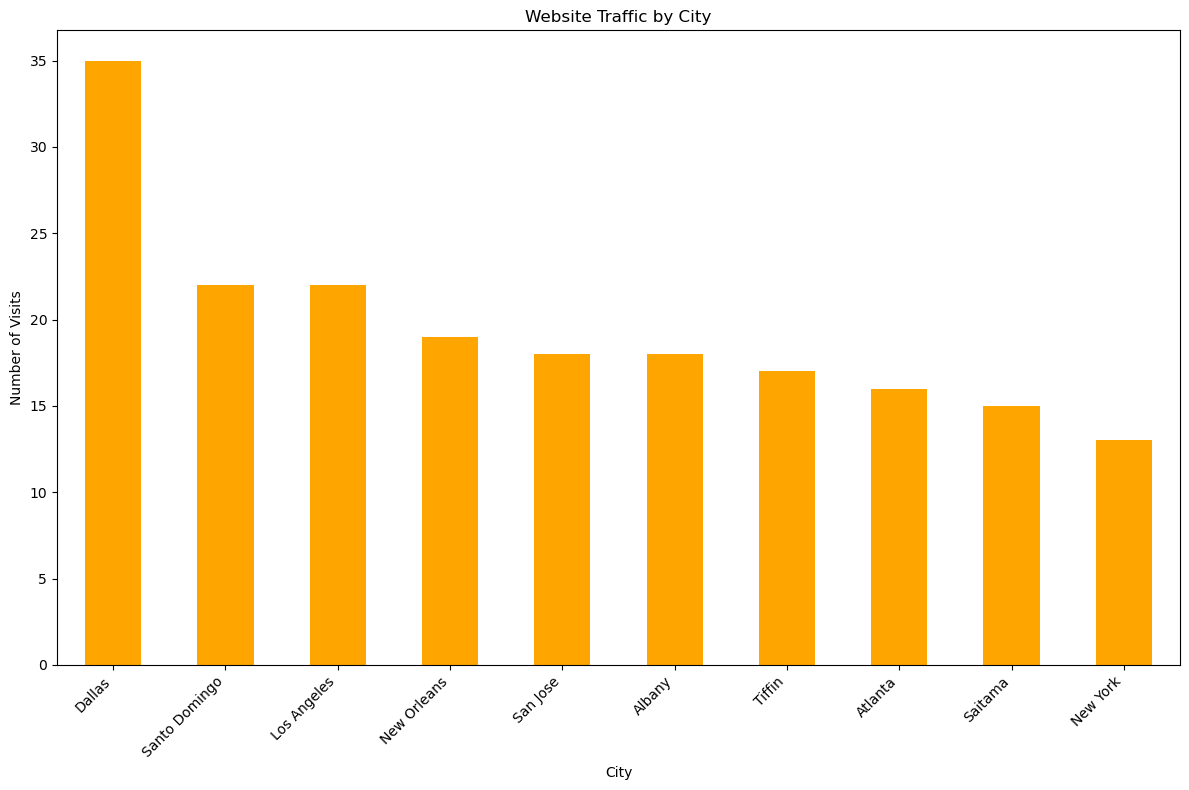

In [120]:
# Counting the number of visits from each city
city_visits = combined_df['city'].value_counts().head(10)

# Creating a bar chart to visualize website traffic by city
plt.figure(figsize=(12, 8))
city_visits.plot(kind='bar', color='orange')
plt.title('Website Traffic by City')
plt.xlabel('City')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


### How effective are Facebook referrals compared to other referral sources?

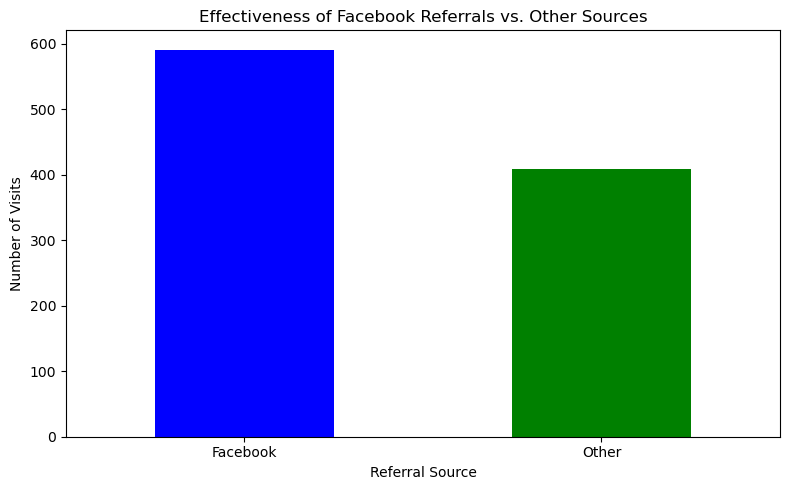

In [122]:
# Classifying referrals into Facebook and Other
combined_df['referral_type'] = 'Other'
combined_df.loc[combined_df['page_referrer'] == 'http://m.facebook.com/', 'referral_type'] = 'Facebook'

# Counting visits from Facebook referrals vs. other referral sources
referral_visits = combined_df['referral_type'].value_counts()

# Creating a bar chart to compare the effectiveness of Facebook referrals to other sources
plt.figure(figsize=(8, 5))
referral_visits.plot(kind='bar', color=['blue', 'green'])
plt.title('Effectiveness of Facebook Referrals vs. Other Sources')
plt.xlabel('Referral Source')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


### What types of content (e.g., OEM parts, specific brands) attract the most users?

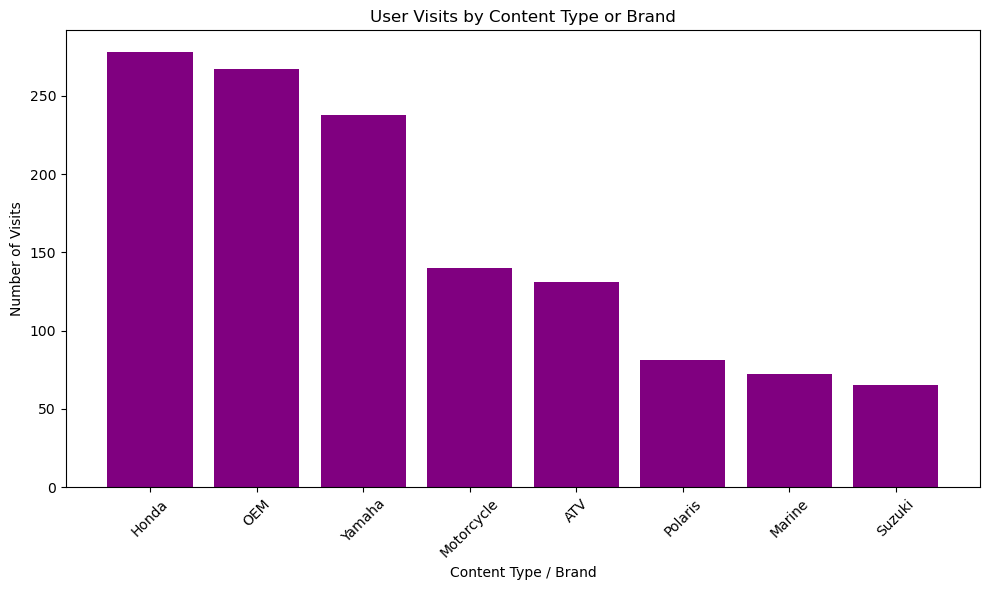

In [128]:
# Extracting keywords or brands from the page_title and counting visits
keywords = ['OEM', 'Polaris', 'Honda', 'Suzuki', 'Yamaha', 'ATV', 'Motorcycle', 'Marine']
# Initializing a dictionary to count visits for each keyword
keyword_visits = {keyword: combined_df[combined_df['page_title'].str.contains(keyword, case=False, na=False)].shape[0] for keyword in keywords}

# Sorting keyword visits by count
keyword_visits_sorted = dict(sorted(keyword_visits.items(), key=lambda item: item[1], reverse=True))

# Creating a bar chart to visualize user visits by content type or brand
plt.figure(figsize=(10, 6))
plt.bar(keyword_visits_sorted.keys(), keyword_visits_sorted.values(), color='purple')
plt.title('User Visits by Content Type or Brand')
plt.xlabel('Content Type / Brand')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


### How does the traffic source impact the geographical distribution of visitors?

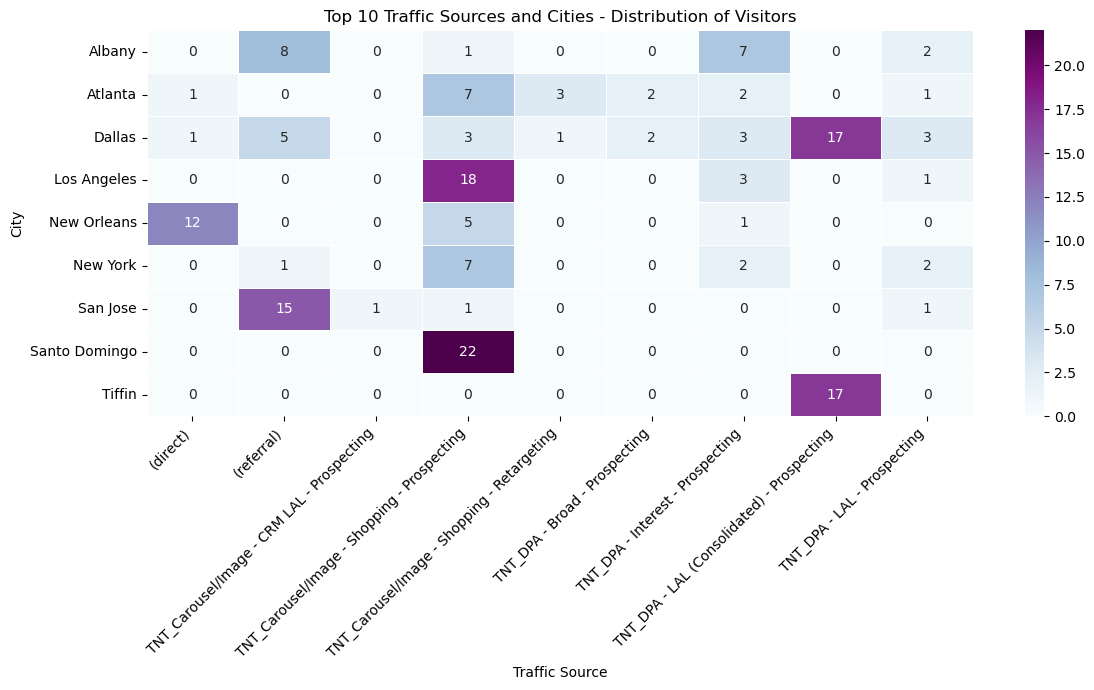

In [125]:
# Selecting the top 10 traffic sources and top 10 cities based on the number of visits
top_10_traffic_sources = combined_df['traffic_source_name'].value_counts().head(10).index
top_10_cities = combined_df['city'].value_counts().head(10).index

# Filtering the original DataFrame to include only top 10 traffic sources and top 10 cities
filtered_df = combined_df[combined_df['traffic_source_name'].isin(top_10_traffic_sources) & df['city'].isin(top_10_cities)]

# Creating a new pivot table with the filtered data
pivot_table_filtered = filtered_df.pivot_table(index='city', columns='traffic_source_name', values='user_pseudo_id', aggfunc='count', fill_value=0)

# Visualizing the filtered data with a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table_filtered, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Top 10 Traffic Sources and Cities - Distribution of Visitors')
plt.xlabel('Traffic Source')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the heatmap
plt.show()


In [84]:
temp=combined_df.head(20)

In [85]:
temp.to_csv('/Users/bhaskaradhikari/freelance/data/external/temp.csv', index=False)

In [86]:
attributes = combined_df.iloc[:, :]
attributes

,is_active_user,event_timestamp,event_date,user_pseudo_id,page_title,page_location,page_referrer,traffic_source_name,traffic_source_medium,traffic_source_source,city,country
0,True,1706041021863308,20240123,1.803115e+09,Multiple Part Numbers Search | P.com,https://www.p.com/search-list,https://www.p.com/catalog-product/collection/4...,(direct),(none),(direct),Columbia,United States
1,True,1706043908464706,20240123,1.370019e+09,"Polaris 5133428 - Nut, Axle | P.com",https://www.p.com/product/polaris/5133428?ref=...,http://m.facebook.com/,(referral),referral,m.facebook.com,Seattle,United States
2,True,1706055327780748,20240123,2.091432e+09,Rock-A-Billy Front/Rear Tires | P.com,https://www.p.com/catalog-product/collection/0...,http://m.facebook.com/,TNT_DPA - Interest - Prospecting,cpc,facebook,NaN,United States
3,True,1705989378681557,20240123,1.821760e+09,"Honda 11330-MFJ-A40 - COVER, R. | P.com",https://www.p.com/product/honda/11330-MFJ-A40?...,NaN,TNT_Carousel/Image - Shopping - Retargeting,cpc,facebook,Cypress,United States
4,True,1706013824763773,20240123,1.665243e+09,"P: OEM Motorcycle Parts, ATV Parts, Marine Parts",https://www.p.com/?utm_source=facebook&utm_med...,http://m.facebook.com/,TNT_Carousel/Image - Shopping - Retargeting,cpc,facebook,Lowell,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,1706059367359036,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook,Midland,United States
996,True,1706059418688359,20240123,8.756038e+08,Yamaha ATV Parts | P.com,https://www.p.com/catalog/yamaha/atv,https://www.p.com/catalog/yamaha?utm_source=fa...,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook,Midland,United States
997,True,1706059422947325,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook,Midland,United States
998,True,1706059426919338,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook,Midland,United States


In [87]:
frequency_encoded_attributes = attributes.apply(lambda x: x.map(x.value_counts()))
frequency_encoded_attributes=frequency_encoded_attributes.dropna()


In [88]:
frequency_encoded_attributes.reset_index(drop=True)

,is_active_user,event_timestamp,event_date,user_pseudo_id,page_title,page_location,page_referrer,traffic_source_name,traffic_source_medium,traffic_source_source,city,country
0,948,1,1000,1,2,2,1.0,94.0,94,94,2.0,915.0
1,948,1,1000,1,1,1,591.0,139.0,142,118,5.0,915.0
2,948,1,1000,1,63,1,591.0,47.0,742,727,1.0,915.0
3,948,1,1000,1,2,1,591.0,134.0,742,727,22.0,915.0
4,948,1,1000,2,1,1,591.0,314.0,742,727,2.0,915.0
...,...,...,...,...,...,...,...,...,...,...,...,...
814,948,1,1000,10,3,3,4.0,314.0,742,727,11.0,915.0
815,948,1,1000,10,5,5,2.0,314.0,742,727,11.0,915.0
816,948,1,1000,10,3,3,4.0,314.0,742,727,11.0,915.0
817,948,1,1000,10,3,3,4.0,314.0,742,727,11.0,915.0


In [89]:
transposed_attributes = frequency_encoded_attributes.T
transposed_attributes

,0,1,4,5,6,7,10,11,13,14,...,989,991,992,993,994,995,996,997,998,999
is_active_user,948.0,948.0,948.0,948.0,948.0,948.0,948.0,948.0,948.0,948.0,...,948.0,948.0,948.0,948.0,948.0,948.0,948.0,948.0,948.0,948.0
event_timestamp,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
event_date,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
user_pseudo_id,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
page_title,2.0,1.0,63.0,2.0,1.0,1.0,20.0,1.0,3.0,6.0,...,1.0,5.0,4.0,1.0,1.0,3.0,5.0,3.0,3.0,1.0
page_location,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,5.0,4.0,1.0,1.0,3.0,5.0,3.0,3.0,1.0
page_referrer,1.0,591.0,591.0,591.0,591.0,591.0,591.0,591.0,591.0,591.0,...,591.0,2.0,7.0,7.0,1.0,4.0,2.0,4.0,4.0,4.0
traffic_source_name,94.0,139.0,47.0,134.0,314.0,314.0,134.0,314.0,134.0,47.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0
traffic_source_medium,94.0,142.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,...,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0
traffic_source_source,94.0,118.0,727.0,727.0,727.0,727.0,727.0,727.0,727.0,727.0,...,727.0,727.0,727.0,727.0,727.0,727.0,727.0,727.0,727.0,727.0


In [90]:
transposed_attributes.isnull().sum().sum()

0

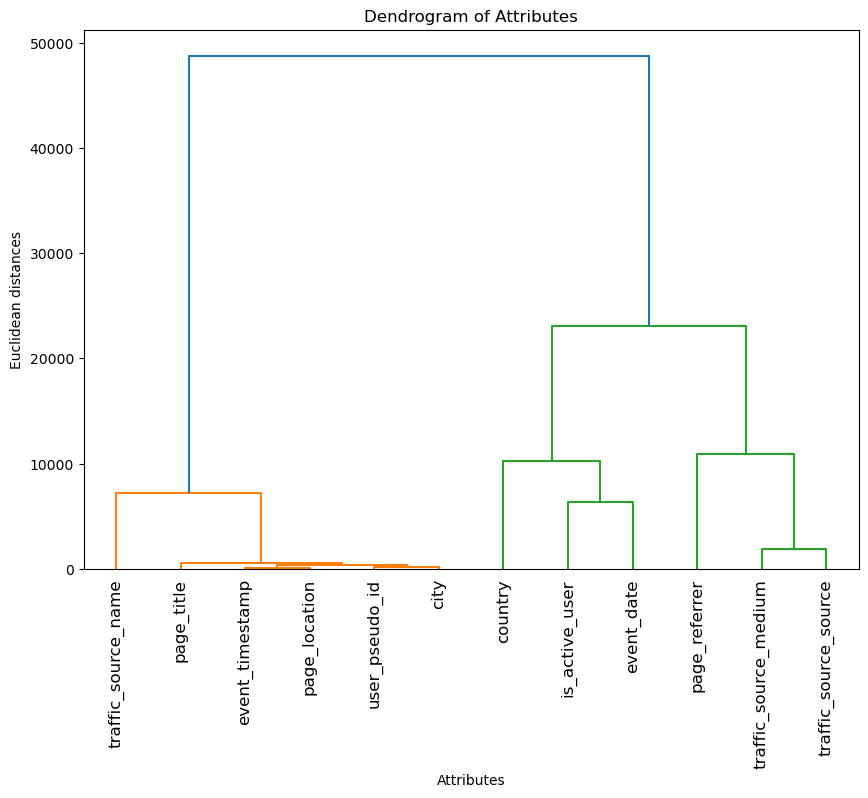

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

linked_attributes = linkage(transposed_attributes, method='ward')

# Creating a dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram(linked_attributes, labels=transposed_attributes.index, leaf_rotation=90)
plt.title("Dendrogram of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Euclidean distances")
plt.show()

# Extracting the order of attributes from the clustering
order = [transposed_attributes.index[i] for i in dendrogram(linked_attributes, no_plot=True)['leaves']]
order.reverse()  # Reverse the order as per the requirement

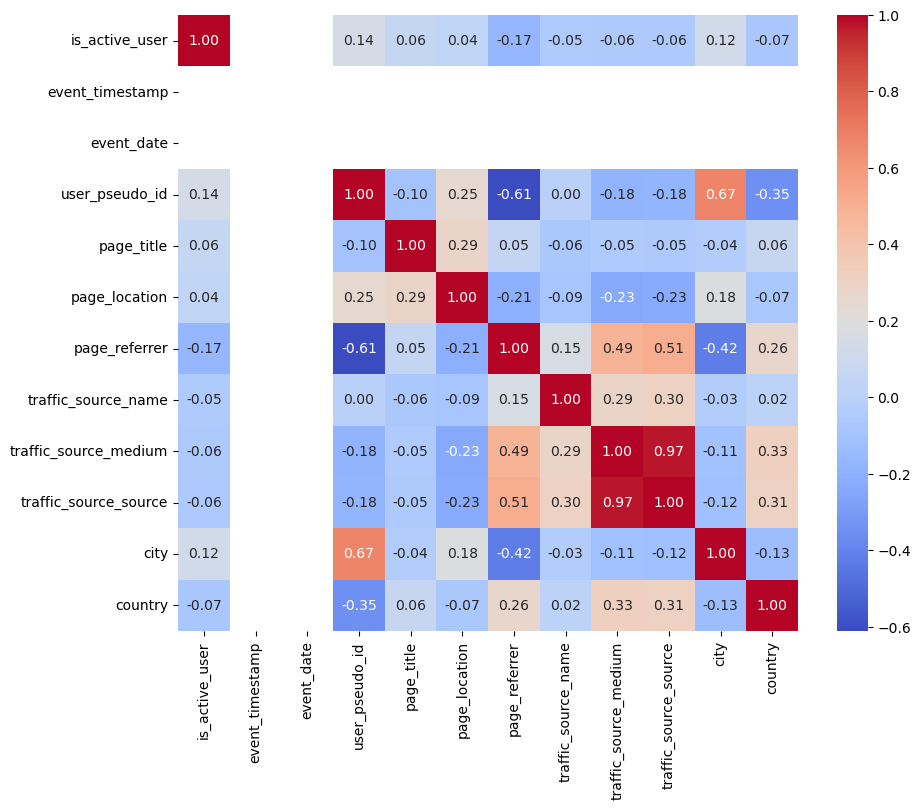

In [94]:
correlation_matrix=frequency_encoded_attributes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

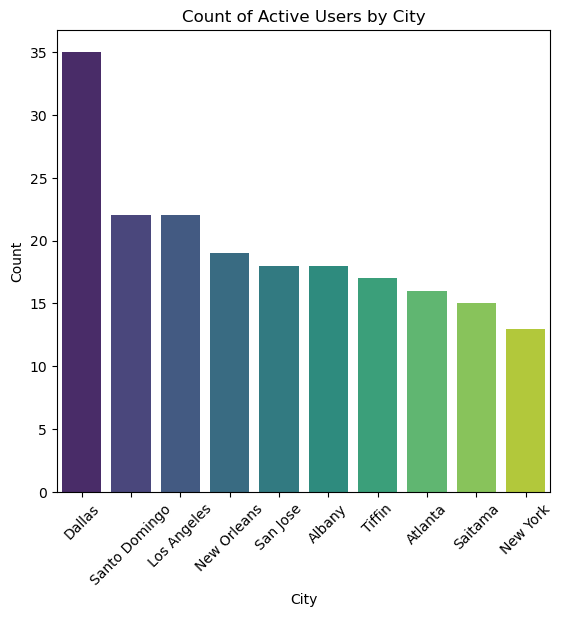

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis 1: Count of active users by city (excluding NaN values)
city_counts = combined_df[combined_df['city'] != 'NaN']['city'].value_counts().head(10)

# Analysis 2: Traffic source medium distribution
traffic_source_medium_counts = combined_df['traffic_source_medium'].value_counts().head(10)

# Visualizations
plt.figure(figsize=(14, 6))

# Visualization 1: Count of active users by city
plt.subplot(1, 2, 1)
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Count of Active Users by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

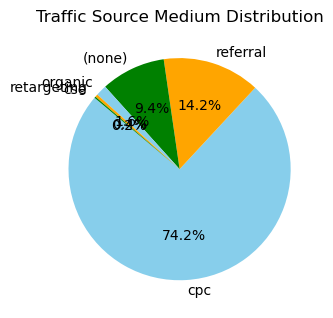

In [43]:
# Visualization 2: Traffic source medium distribution
plt.subplot(1, 2, 2)
traffic_source_medium_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green'])
plt.title('Traffic Source Medium Distribution')
plt.ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

In [46]:
df=combined_df

/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

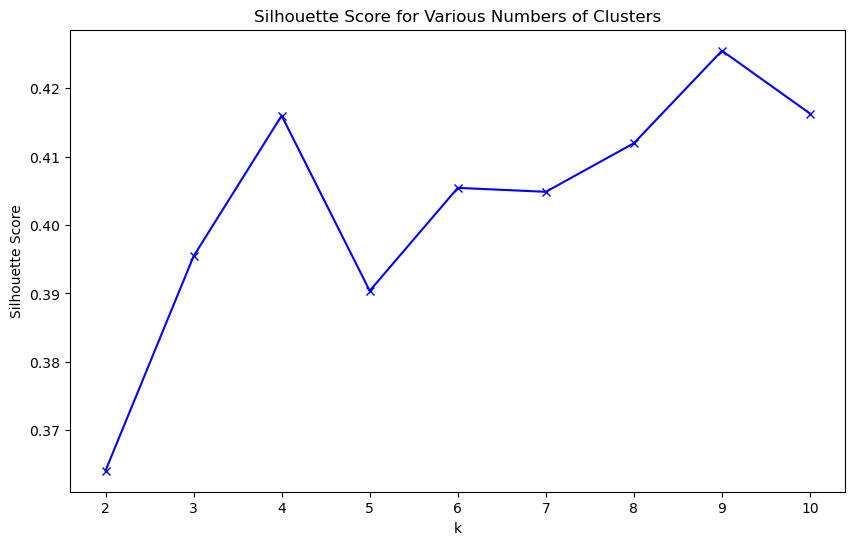

Optimal number of clusters: 9
         event_timestamp  user_pseudo_id
Cluster                                 
0           1.705995e+15    4.084145e+08
1           1.706054e+15    1.804715e+09
2           1.706057e+15    2.770538e+08
3           1.706021e+15    1.848824e+09
4           1.706015e+15    9.372503e+08
5           1.706031e+15    3.896180e+08
6           1.706059e+15    1.036431e+09
7           1.706032e+15    1.350017e+09
8           1.705994e+15    1.836617e+09


/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Data Preprocessing
## Select numerical features for clustering
features = ['event_timestamp', 'user_pseudo_id']
X = df[features]

## Handling missing values (if any) - For simplicity, dropping rows with NaNs
X = X.dropna()

## Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the Optimal Number of Clusters
## Using the silhouette score to find the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.show()

# Choose the number of clusters (k) with the highest silhouette score
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Clustering with Optimal Number of Clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster information to the original DataFrame
df['Cluster'] = clusters

# Summary of Clusters
print(df.groupby('Cluster')[features].mean())

# This completes the clustering. You can further analyze the clusters to understand the segments.
